In [3]:
# Requires Python 3.9 - 3.11

%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [4]:
# Creating f(x) to test limit ---> limit h-> 0 [f(x + h) - f(x)]

def f(x):
    return 3*(x**2) - 4*x



In [5]:
# Test for x = 1:
# Putting h -> 0 below.

for h in 10.0 ** np.arange(-1, -6, -1):
    print(f" h = {h:.5f}, numerical limit = { (f(1+h) - f(1))/h:.5f}")


 h = 0.10000, numerical limit = 2.30000
 h = 0.01000, numerical limit = 2.03000
 h = 0.00100, numerical limit = 2.00300
 h = 0.00010, numerical limit = 2.00030
 h = 0.00001, numerical limit = 2.00003


In [6]:
# Derivative tells us the slope of a function at a particular location

# Visualization Utilities

In [7]:
#    The comment #@save is a special modifier that allows us to save any function, 
#    class, or other code block to the d2l package so that we can invoke it later 
#    without repeating the code, e.g., via d2l.use_svg_display().

In [8]:
def use_svg_display(): #@save
    """
        Use the SVG format to display a plot in Jupyter
    """
    backend_inline.set_matplotlib_formats('svg')

In [13]:
def set_figsize(figsize = (3.5, 2.5)): #@save
    """
        Set the figure size for matplotlib.
        from matplotlib import pyplot as plt was marked via #@save in the d2l package. 
        This can be called via d2l.plt

    """

    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [10]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """
        This function is used to set the axes for the figure in matplotlib
        Fixes the Labels, Ranges and Scales.
    """

    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [11]:
# Now, we plot to overlay multiple curves. Ensuring size and shapes of input matches.

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    
    """
        This function is used to plot the data points.
    
    """

    def has_one_axis(X):  
        """
            Returns True if X (tensor or list) has 1 axis
        """
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

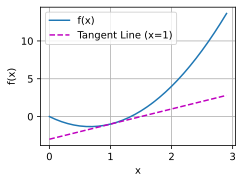

In [14]:
# PLotting the curve and the tangent at u = f(x) [curve]
# y = 2x -3 [tangent]

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2*x - 3], 'x', 'f(x)', legend = ['f(x)', 'Tangent Line (x=1)'])



# Partial Derivatives and Gradients

In [15]:
# Multivariate functions
# If you have multiple variables, treat the main variable as a variable and the remaining as constants.
# Concatenate the partial derivatives of a multivariate function wrt all its variables to obtain a vector
# called the GRADIENT.

# GRADIENTS are difficult to compute in Deep Learning because we work with deeply nested functions
# f(f(f(f(f(f(x)))))))....
# This is taken care of by the CHAIN RULE.
# dy/dx = (dy/du) * (du/dx)




In [ ]:
# Backpropogation is a computer mechanism to apply CHAIN RULE.
# Multiplication of matrices takes place to compute derivatives.
# A graph is traversed in the forward direction (to evaluate a function)
# And again in backward direction when we compute the GRADIENT.